# Ensemble Methods

# Voting Classifiers 

`Ensemble methods works best when the predictors are as independant from one another as possible`

***This is why we focus much on diversity of classifiers (i.e algos used) effectivly reducing the chances of correlated errors by some margin***

In [70]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier ,ExtraTreesClassifier , AdaBoostClassifier , GradientBoostingRegressor,StackingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
X,y = make_moons(n_samples=500,noise=0.30,random_state=42)
X_tr , X_ts, y_tr , y_ts = train_test_split(X,y,random_state=42) # not using test set maybe cuh this is just an example
voting_clf = VotingClassifier([
    ('lr',LogisticRegression(random_state=42)),
    ('Rf',RandomForestClassifier(random_state=42)),
    ('svc',SVC(random_state=42))
])


voting_clf.fit(X_tr,y_tr)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('Rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [4]:
for i ,clf in voting_clf.named_estimators_.items():
    print(i ,"=",clf.score(X_ts,y_ts))  # here we checked the accuracy of each individual model on the preds.... where i,clf enumurate in the name defined by us during pipelinging and the classifiers associated with it.... also '_' shows these are clones

lr = 0.864
Rf = 0.896
svc = 0.896


In [5]:
# calling predict methods perform hard voting 
print(voting_clf.predict(X_ts[:1]))
# now to check what the clones did 
print([clf.predict(X_ts[:1]) for clf in voting_clf.estimators_])
# checks out our definition of majority voting 

[1]
[array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64)]


In [6]:
# performance on test set 
voting_clf.score(X_ts,y_ts)
# match this with the scores above and it is a massive improvemnt 

0.912

In [7]:
# adjusting within the already made voting_clf 
# make sure to make change in MAIN not in clones as it'll not reflect the other way around
voting_clf.voting ="soft"
voting_clf.named_estimators["svc"].probability = True
voting_clf.fit(X_tr,y_tr)
voting_clf.score(X_ts,y_ts)

# 92% acc

0.92

# Bagging and Pasting 

In [8]:
# training 500 trees over a replacable sample so BAGGING
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1,random_state=42)
bag_clf.fit(X_tr,y_tr)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [9]:
# testing acc over test set 
bag_clf.score(X_ts,y_ts)
# clearly at the current setup Voting clf is better now what if we try with pating 

0.904

In [10]:
# training 500 trees over a replacable sample so BAGGING
bag_clf_p = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1,bootstrap=False,random_state=42)
bag_clf_p.fit(X_tr,y_tr)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [11]:
bag_clf_p.score(X_ts,y_ts)
# pasting clears lmao 

0.92

Text(0, 0.5, '')

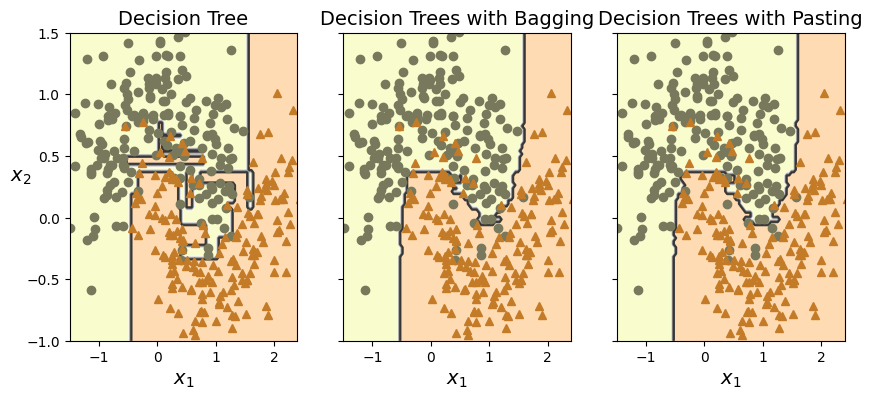

In [12]:
# Copying code from the book to visualise 
# extra code – this cell generates and saves Figure 7–5

def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_tr, y_tr)

fig, axes = plt.subplots(ncols=3, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_tr, y_tr)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_tr, y_tr)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
plt.sca(axes[2])
plot_decision_boundary(bag_clf_p, X_tr, y_tr)
plt.title("Decision Trees with Pasting")
plt.ylabel("")


`Decision boundary is less irregular (which is a plus tbh) but as stated the bias is roughly similar check the area under the curve to get an idea`

In [13]:
tree_clf.score(X_ts,y_ts)
# lmao noob

0.856

# OOB eval

In [14]:
bag_clf_oob = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,oob_score=True,random_state=42,n_jobs=-1)
bag_clf_oob.fit(X_tr,y_tr)
bag_clf_oob.oob_score_
# so it states that our clf is likely to achieve *9.6 acc 

0.896

In [15]:
# checking acc 
bag_clf_oob.score(X_ts,y_ts)
# more than oob_score noice 

0.92

In [16]:
#The OOB decision function for each training instance is also available through the oob_decision_function_ attribute.
bag_clf_oob.oob_decision_function_[:3]
# since DT has proba method it returns class probabilities for each instances 

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

# Random Forest
`More optimisied version of Bagging ensemble over DTs`

In [17]:
Rf_clf = RandomForestClassifier(n_estimators=500,random_state=42,n_jobs=-1,max_leaf_nodes=16)
Rf_clf.fit(X_tr,y_tr)
Rf_clf.score(X_ts,y_ts)

0.912

In [18]:
# comparing with bagging classifier   !!!! we deliberately made the DTs to match Rf
bag_clf_rf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",max_leaf_nodes=16),n_estimators=500,n_jobs=-1,random_state=42)
bag_clf_rf.fit(X_tr,y_tr)
bag_clf_rf.score(X_ts,y_ts)

0.912

In [19]:
# extra tree classifier 
ex_t_clf = ExtraTreesClassifier(n_estimators=500,n_jobs=-1,random_state=42,max_leaf_nodes=20)
ex_t_clf.fit(X_tr,y_tr)

ex_t_clf.score(X_ts,y_ts)

0.912

`It is hard to tell in advance whether a RandomForestClassifier will perform better or worse
than an ExtraTreesClassifier. Generally, the only way to know is to try both and compare
them using cross-validation.`

In [20]:
# features importance on iris dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
Rf_clf_FI = RandomForestClassifier(n_estimators=500,random_state=42)
Rf_clf_FI.fit(iris.data,iris.target)


RandomForestClassifier(n_estimators=500, random_state=42)

In [21]:
for score , name in zip(Rf_clf_FI.feature_importances_,iris.data.columns):
    print(name,round(score,2))

sepal length (cm) 0.11
sepal width (cm) 0.02
petal length (cm) 0.44
petal width (cm) 0.42


In [22]:
# trying to rerplicate the heatmap of MNIST image dataset 
from sklearn.datasets import fetch_openml
X_m , y_m = fetch_openml("mnist_784",return_X_y=True, as_frame=False,parser="auto")
rf_mnist = RandomForestClassifier(n_estimators=200,random_state=42)

rf_mnist.fit(X_m,y_m)

RandomForestClassifier(n_estimators=200, random_state=42)

(-0.5, 27.5, 27.5, -0.5)

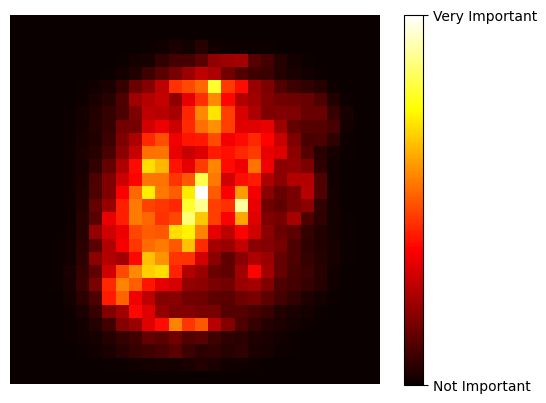

In [23]:
heatmap_image = rf_mnist.feature_importances_.reshape(28,28)
plt.imshow(heatmap_image,cmap="hot")

cbar = plt.colorbar(ticks=[rf_mnist.feature_importances_.min(),
                           rf_mnist.feature_importances_.max()])
cbar.ax.set_yticklabels(["Not Important","Very Important"])
plt.axis("off")

# so as we know from lookiing at images most of data is generally in the center 

(-0.5, 27.5, 27.5, -0.5)

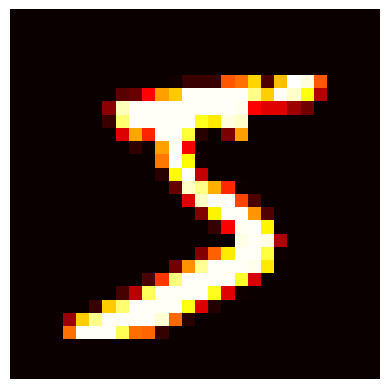

In [24]:
num_image = X_m[:1].reshape(28,28)
plt.imshow(num_image,cmap="hot")
plt.axis("off")
# mastches with above

# ADABoost
`Following code trains adabosot based on 30 decision stumps(max_depth=1)`

`If your AdaBoost ensemble is overfitting the training set, you can try reducing the number
of estimators or more strongly regularizing the base estimator.
`

In [32]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=25,learning_rate=0.5,random_state=42
)
ada_clf.fit(X_tr,y_tr)

c:\Users\whate\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=25, random_state=42)

In [33]:
ada_clf.score(X_ts,y_ts)

0.904

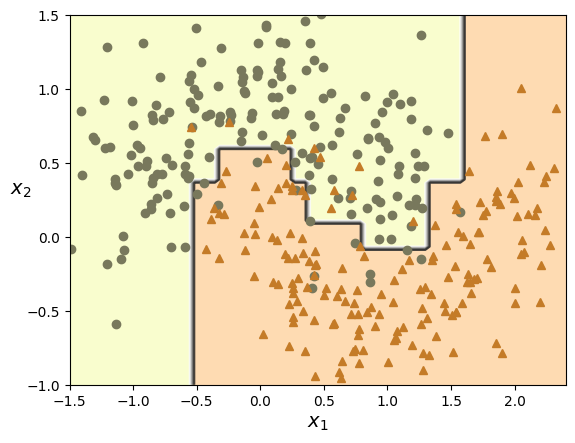

In [34]:
plot_decision_boundary(ada_clf,X_tr,y_tr)

# Gradient Boosting
`tries
to fit the new predictor to the residual errors made by the previous predictor.`



    <h2>1. Initial Training</h2>
    <div class="diagram">
+-------------------+<br>
|    Dataset        |<br>
|  X   |  y         |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  Train First Predictor  |<br>
|  (Weak Learner)       |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  Initial Predictions |<br>
|  ŷ1                |<br>
+-------------------+<br>
    </div>

    <h2>2. Compute Residuals</h2>
    <div class="diagram">
+-------------------+<br>
|  Initial Predictions |<br>
|  ŷ1                |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  Compute Residuals  |<br>
|  Residuals = y - ŷ1 |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  Residual Errors  |<br>
|  e1               |<br>
+-------------------+<br>
    </div>

    <h2>3. Fit New Predictor</h2>
    <div class="diagram">
+-------------------+<br>
|  Residual Errors  |<br>
|  e1               |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  Train New Predictor |<br>
|  (Second Weak Learner) |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  New Predictions  |<br>
|  ŷ2              |<br>
+-------------------+<br>
    </div>

    <h2>4. Update Weights</h2>
    <div class="diagram">
+-------------------+<br>
|  New Predictions  |<br>
|  ŷ2              |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  Update Weights   |<br>
|  Based on Errors   |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  Updated Weights  |<br>
|  for Next Iteration |<br>
+-------------------+<br>
    </div>

    <h2>5. Combine Predictions</h2>
    <div class="diagram">
+-------------------+<br>
|  Predictions from  |<br>
|  Weak Learners    |<br>
|  ŷ1, ŷ2, ...    |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  Combine Predictions |<br>
|  Weighted Sum       |<br>
+-------------------+<br>
        |<br>
        v<br>
+-------------------+<br>
|  Final Prediction |<br>
|  ŷ_final         |<br>
+-------------------+<br>
    </div>


</body>
</html>


In [47]:
np.random.seed(42)

X = np.random.rand(100,1)-0.5
y = 3*X[:,0]**2 +0.05*np.random.randn(100) # y = 3x^2 + noise 

tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [48]:
# now we have obtained a trained model time to get residuals 
err = y - tree_reg.predict(X)
# now time to train the next model over these residuals 
tree_reg2=DecisionTreeRegressor(max_depth=2,random_state=43)
tree_reg2.fit(X,err)

DecisionTreeRegressor(max_depth=2, random_state=43)

In [49]:
err[:5]

array([-0.07199323,  0.06591133,  0.04248548, -0.19374408,  0.22041981])

In [50]:
# repeat once more 
err2 = err-tree_reg2.predict(X)

tree_reg3 = DecisionTreeRegressor(max_depth=2,random_state=44)
tree_reg3.fit(X,err2)

DecisionTreeRegressor(max_depth=2, random_state=44)

In [51]:
err2[:5]

array([ 0.01840471,  0.02599835,  0.00257251, -0.10334615,  0.06058178])

In [61]:
# now we combuine preds 
X_new = np.array([[-0.4],[0],[0.5]])
sum(tree.predict(X_new) for tree in(tree_reg,tree_reg2,tree_reg3) ).round(4)

array([0.4948, 0.0402, 0.7503])

In [58]:
tree_reg3.predict(X_new).round(4)

array([0.007 , 0.007 , 0.1818])

In [59]:
tree_reg2.predict(X_new).round(4)

array([-0.    , -0.0904,  0.0399])

In [60]:
tree_reg.predict(X_new).round(4)

array([0.4878, 0.1236, 0.5286])

In [64]:
# trying with GBRT class
gbrt = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1,random_state=42)
gbrt.fit(X,y)
gbrt.predict(X_new).round(4)

array([0.4948, 0.0402, 0.7503])

In [66]:
gbrt_best = GradientBoostingRegressor(max_depth=2,learning_rate=0.05,n_estimators=500,n_iter_no_change=10,random_state=42)
gbrt_best.fit(X,y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

`Several other optimized implementations of gradient boosting are available in the Python
ML ecosystem: in particular, XGBoost, CatBoost, and LightGBM. These libraries have
been around for several years. They are all specialized for gradient boosting, their APIs
are very similar to Scikit-Learn’s, and they provide many additional features, including
GPU acceleration; you should definitely check them out! Moreover, the TensorFlow
Random Forests library provides optimized implementations of a variety of random forest
algorithms, including plain random forests, extra-trees, GBRT, and several more`

# Stacking


In [81]:
stack_clf = StackingClassifier(estimators=[
    ('lr',LogisticRegression(random_state=42)),
    ('rf',RandomForestClassifier(random_state=42)),
    ('svc',SVC(probability=True,random_state=42))
],
final_estimator = RandomForestClassifier(random_state=43),cv=5)

stack_clf.fit(X_tr,y_tr)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [82]:
stack_clf.score(X_ts,y_ts)

0.928

***In conclusion, ensemble methods are versatile, powerful, and fairly simple to
use. Random forests, AdaBoost, and GBRT are among the first models you
should test for most machine learning tasks, and they particularly shine with
heterogeneous tabular data. Moreover, as they require very little
preprocessing, they’re great for getting a prototype up and running quickly.
Lastly, ensemble methods like voting classifiers and stacking classifiers can
help push your system’s performance to its limits***